# the first step

Insert the path of data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011.0,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011.0,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011.0,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011.0,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011.0,NaN,San Francisco,NaN


# Libraries import

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np


In [ ]:
df.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30362 entries, 0 to 30361
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                30362 non-null  int64  
 1   EmployeeName      30361 non-null  object 
 2   JobTitle          30361 non-null  object 
 3   BasePay           30361 non-null  float64
 4   OvertimePay       30361 non-null  float64
 5   OtherPay          30361 non-null  float64
 6   Benefits          0 non-null      float64
 7   TotalPay          30361 non-null  float64
 8   TotalPayBenefits  30361 non-null  float64
 9   Year              30361 non-null  float64
 10  Notes             0 non-null      float64
 11  Agency            30361 non-null  object 
 12  Status            0 non-null      float64
dtypes: float64(9), int64(1), object(3)
memory usage: 3.0+ MB


In [ ]:
for x in ['Status','Notes' , 'Id', 'Agency']:
    df = df.drop(columns= x)

In [ ]:
df.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,30361.000000,30361.000000,30361.000000,0.0,30361.000000,30361.000000,30361.0
mean,74696.904818,5379.488587,4237.655611,NaN,84314.049016,84314.049016,2011.0
std,34452.939565,11261.837830,8532.614169,NaN,41207.910605,41207.910605,0.0
min,0.000000,0.000000,0.000000,NaN,14682.220000,14682.220000,2011.0
25%,52076.660000,0.000000,46.000000,NaN,55316.810000,55316.810000,2011.0
50%,68522.980000,349.900000,1280.000000,NaN,77318.230000,77318.230000,2011.0
75%,97847.650000,5713.800000,5027.210000,NaN,109822.320000,109822.320000,2011.0
max,294580.020000,245131.880000,400184.250000,NaN,567595.430000,567595.430000,2011.0


In [ ]:
fig = px.box(df, x='BasePay', points="all", color_discrete_sequence=['lightcoral'])
fig.update_layout(title_text='Box Plot for BasePay', xaxis_title='BasePay')
fig.show()

In [ ]:
fig = px.histogram(df, x='BasePay', nbins=10, color_discrete_sequence=['skyblue'], marginal='rug')
fig.update_layout(title_text='Distribution of BasePay', xaxis_title='BasePay', yaxis_title='Frequency')
fig.show()

In [ ]:
df = df[df['BasePay'] > 0]


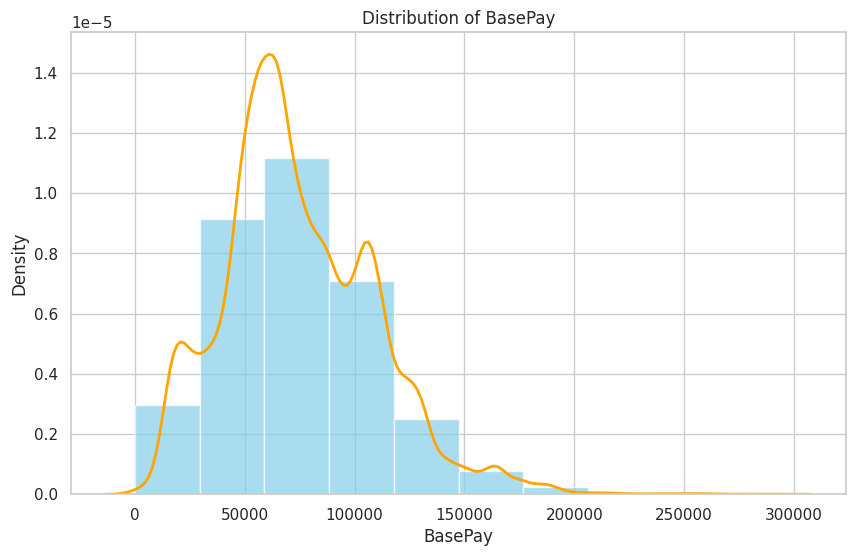

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.hist(df['BasePay'], bins=10, density=True, color='skyblue', alpha=0.7)
sns.kdeplot(df['BasePay'], color='orange', linewidth=2)
plt.title('Distribution of BasePay')
plt.xlabel('BasePay')
plt.ylabel('Density')
plt.show()



In [ ]:
Q1 = df['BasePay'].quantile(0.25)
Q3 = df['BasePay'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['BasePay'] >= lower_bound) & (df['BasePay'] <= upper_bound)]


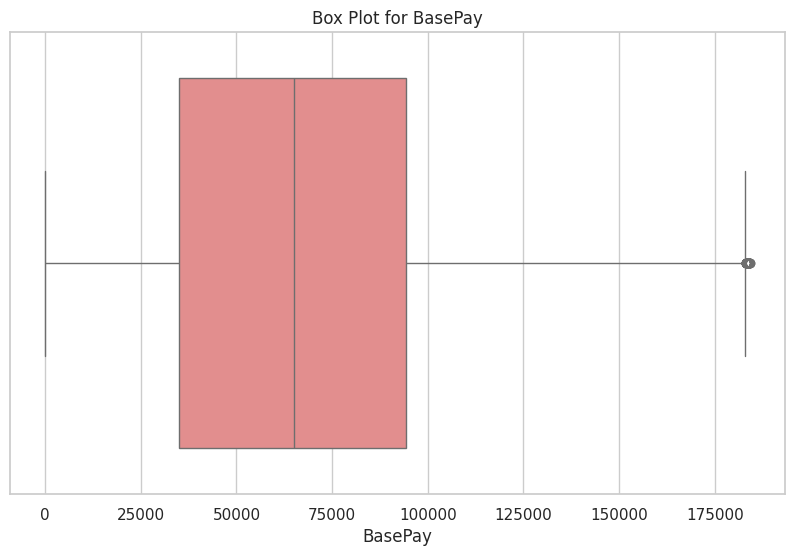

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['BasePay'], color='lightcoral')
plt.title('Box Plot for BasePay')
plt.xlabel('BasePay')
plt.show()

In [ ]:
mean_value = df['BasePay'].mean()
# Fill missing values with the mean
df['BasePay'].fillna(mean_value, inplace=True)

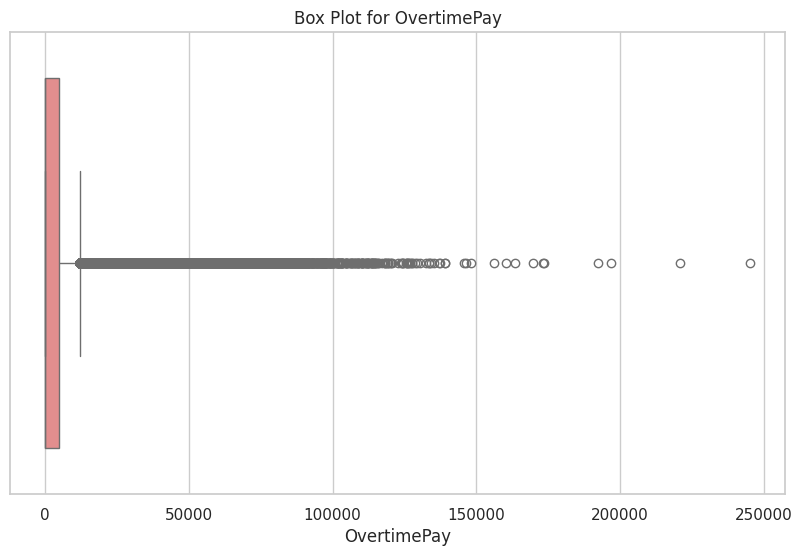

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['OvertimePay'], color='lightcoral')
plt.title('Box Plot for OvertimePay')
plt.xlabel('OvertimePay')
plt.show()

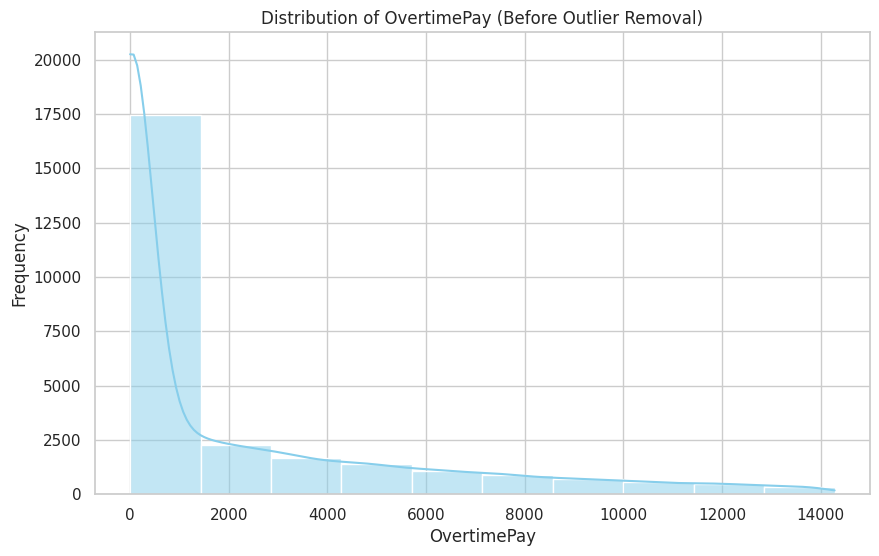

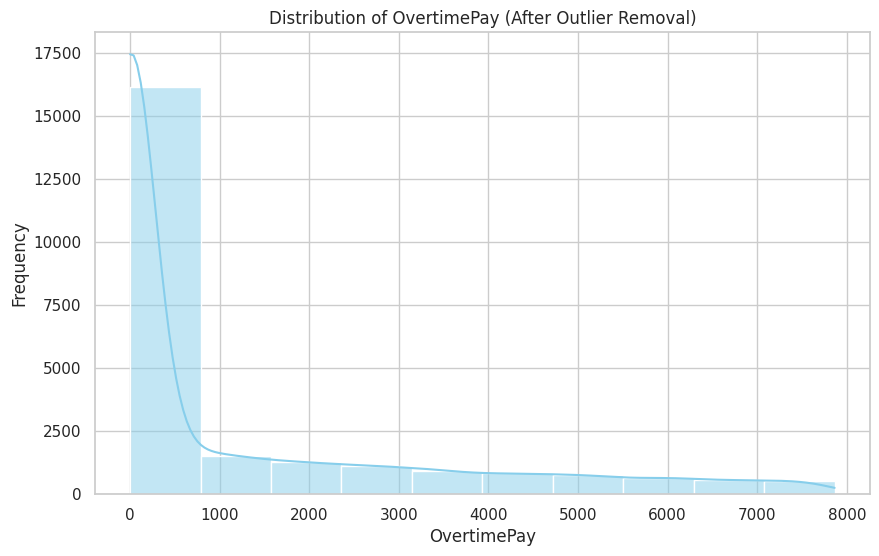

In [ ]:

# Plot 1: Initial Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['OvertimePay'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of OvertimePay (Before Outlier Removal)')
plt.xlabel('OvertimePay')
plt.ylabel('Frequency')
plt.show()

# Outlier Removal
Q1 = df['OvertimePay'].quantile(0.25)
Q3 = df['OvertimePay'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['OvertimePay'] >= lower_bound) & (df['OvertimePay'] <= upper_bound)]

# Plot 2: Distribution after Outlier Removal
plt.figure(figsize=(10, 6))
sns.histplot(df['OvertimePay'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of OvertimePay (After Outlier Removal)')
plt.xlabel('OvertimePay')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Calculate the mean of the column
mode_value = df['OvertimePay'].mode()[0]  # The mode() function returns a Series, [0] extracts the first mode

# Fill missing values with the mode
df['OvertimePay'].fillna(mode_value, inplace=True)

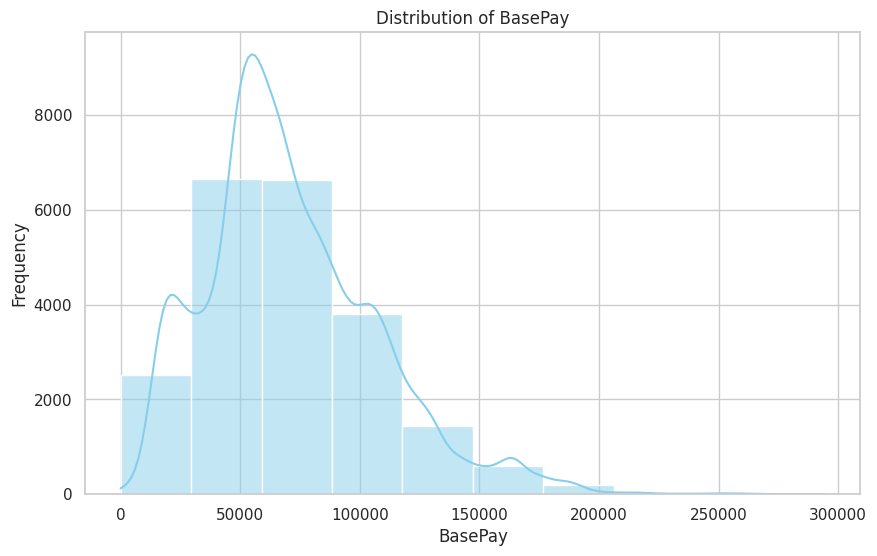

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['BasePay'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of BasePay')
plt.xlabel('BasePay')
plt.ylabel('Frequency')
plt.show()

<ipython-input-61-cc80c3ae9f7f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

<ipython-input-61-cc80c3ae9f7f>:7: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.


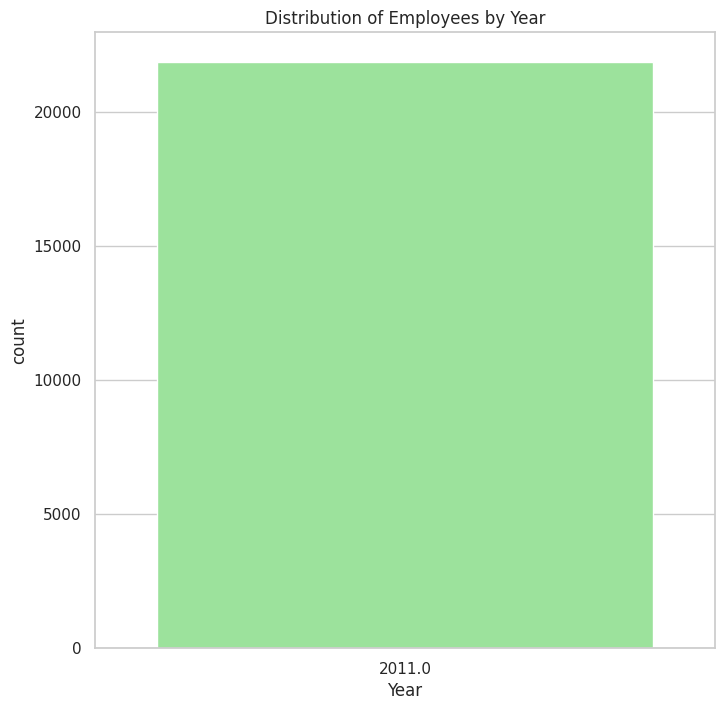

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Year', data=df, palette=['lightgreen', 'lightcoral'], order=df['Year'].value_counts().index)
plt.title('Distribution of Employees by Year')
plt.show()

<ipython-input-36-65d001aff802>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




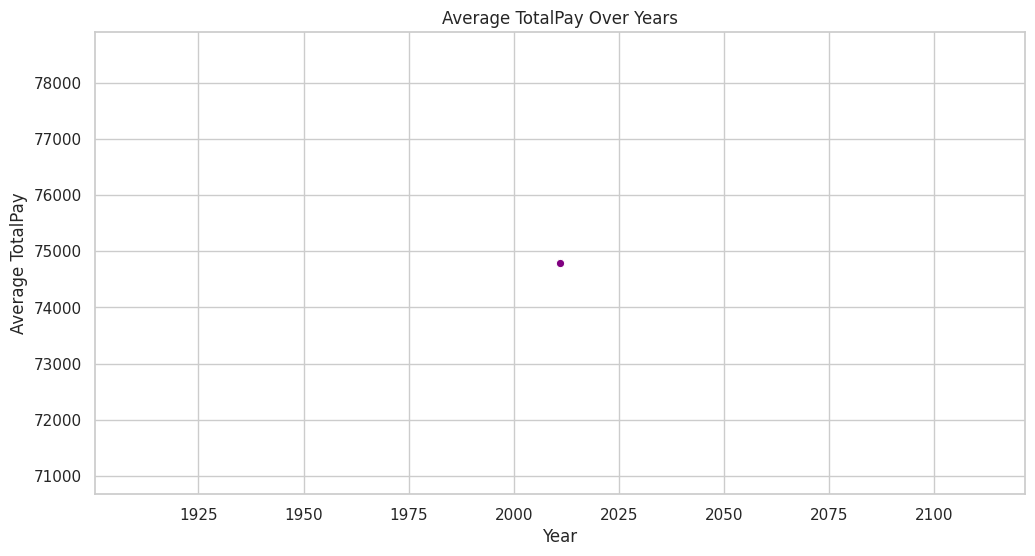

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['Year'], y=df['TotalPay'], estimator='mean', ci=None, marker='o', color='purple')
plt.title('Average TotalPay Over Years')
plt.xlabel('Year')
plt.ylabel('Average TotalPay')
plt.show()

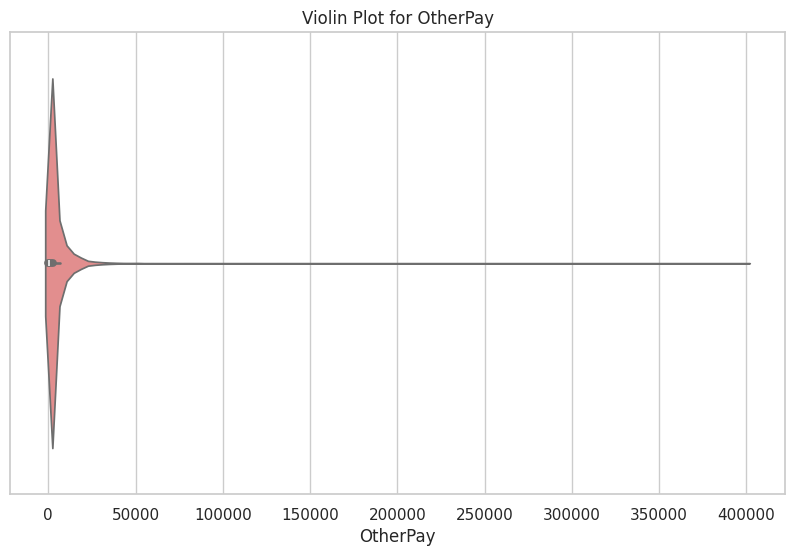

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['OtherPay'], color='lightcoral')
plt.title('Violin Plot for OtherPay')
plt.xlabel('OtherPay')
plt.show()


In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns

# Create histograms for all numerical columns using plotly
fig = px.histogram(df, x=numerical_columns, nbins=10, facet_col_wrap=3)
fig.update_layout(title_text='Histograms for Numerical Columns', showlegend=False)
fig.show()


<ipython-input-60-34fc52c973ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


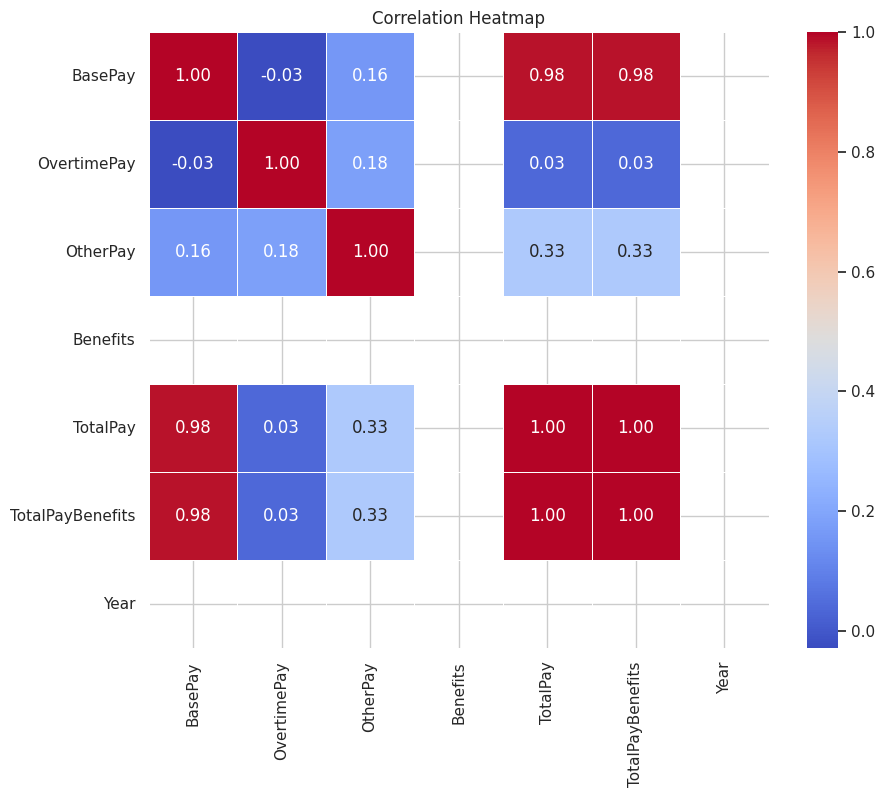

In [ ]:
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
df.describe(include='O')

,EmployeeName,JobTitle
count,21873,21873
unique,21168,983
top,DAVID WONG,SPECIAL NURSE
freq,6,788


<ipython-input-57-36ab9c59a394>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



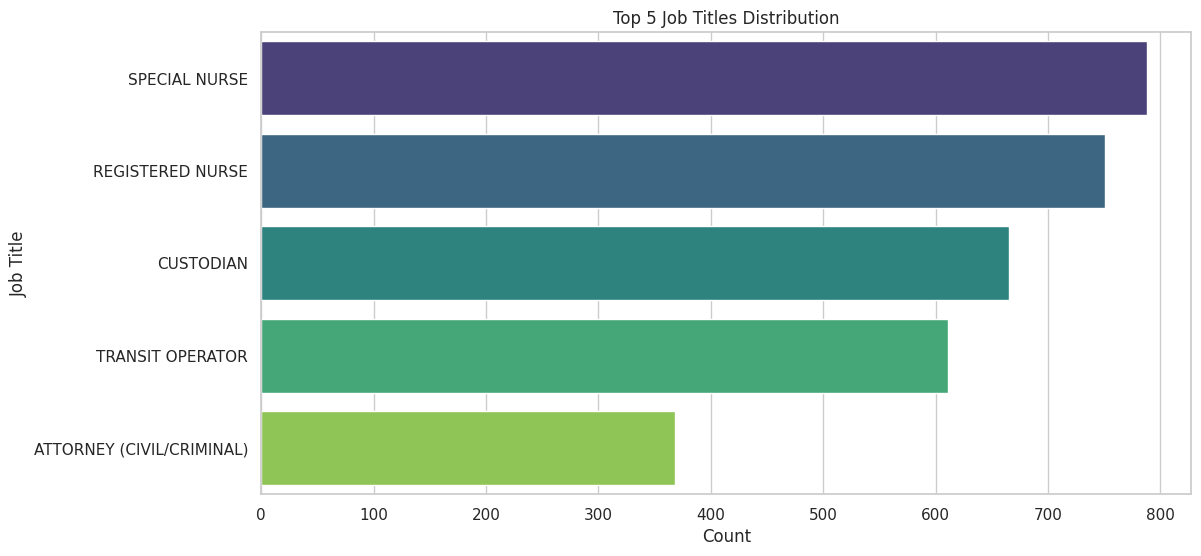

In [ ]:
plt.figure(figsize=(12, 6))
top_job_titles = df['JobTitle'].value_counts().nlargest(5).index
sns.countplot(y=df['JobTitle'], order=top_job_titles, palette='viridis')
plt.title('Top 5 Job Titles Distribution')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()


# best Luck!